<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Advanced%20Topics/Large%20Language%20Models%20(LLMs)%20%26%20Foundation%20Models/Diffusion%20Models%20%26%20Generative%20AI%20Beyond%20Text/diffusion_simple_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffusion Models & Generative AI Beyond Text
_Educational Demo_

This is a **Tier 1** simple notebook meant to introduce the *concepts* behind Diffusion Models without heavy compute.

It covers:

- **Stable Diffusion architecture**
- **Denoising Diffusion Probabilistic Models (DDPM)**
- **Text-to-Image & Text-to-Video generation**
- **ControlNet for guided generation**

We will use a **tiny pre-trained diffusion model** so it runs quickly in Google Colab.
#
> **Disclaimer**: This is for **educational purposes only**, outputs will not be high quality or photorealistic.


## 1. Install Dependencies
We install lightweight versions of the libraries needed for a simple diffusion demo:
- **diffusers**: Prebuilt pipelines for diffusion models
- **torch** & **torchvision**: For tensor operations and image utilities



In [7]:
!pip -q install diffusers accelerate torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB/s eta 0:00:00


## 2. Imports

In [8]:
import torch
from diffusers import DDPMPipeline
from PIL import Image

## 3. Load a Tiny Pre-trained Diffusion Model

We use `google/ddpm-cifar10-32` — a very small DDPM trained on CIFAR-10 images (32x32 pixels).

This allows fast inference while still showing how the pipeline works.

In [9]:
pipeline = DDPMPipeline.from_pretrained("google/ddpm-cifar10-32")
pipeline = pipeline.to("cuda" if torch.cuda.is_available() else "cpu")

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/143M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


## 4. Generate Images from Scratch

This model is unconditional (no text prompts), but it shows the DDPM sampling process.


  0%|          | 0/1000 [00:00<?, ?it/s]

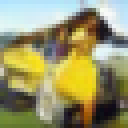

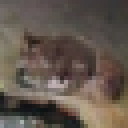

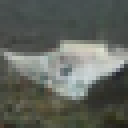

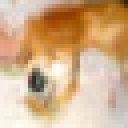

In [10]:
images = pipeline(batch_size=4).images

for idx, img in enumerate(images):
    img = img.resize((128, 128), Image.NEAREST)
    display(img)

## 5. Concept Recap

### Stable Diffusion
- Combines a **Variational Autoencoder (VAE)** with a **U-Net** denoiser and a **text encoder** (like CLIP).
- Works in the **latent space** for efficiency.

### DDPM
- Trains by gradually adding noise to data (forward process).
- Learns to reverse this process and denoise step-by-step.

### Text-to-Image / Video
- Adds a **text encoder** to guide generation with prompts.
- Can be extended to videos by adding temporal layers.

### ControlNet
- Lets you **guide** generation with additional conditions (e.g., edge maps, poses).


## Educational Purpose Disclaimer
This is a **basic educational version** of the concepts behind diffusion-based generative models.
- The models here are **tiny** and will not produce accurate or high-quality results.
- This notebook is meant purely for understanding the *process*, not for production use.